In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [25]:

# Load your dataset
df = pd.read_csv('gaming_behavior.csv')

# Display the first few rows
df.head()


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [26]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (you can choose appropriate strategies)
df.fillna(method='ffill', inplace=True)  # Forward fill as an example


PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


C:\Users\71538\AppData\Local\Temp\ipykernel_9156\1404916217.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill as an example


In [27]:
# Separate features and target variable
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']

# Define categorical and numerical columns
ordinal_cols = ['GameDifficulty']
nominal_cols = ['Gender', 'GameGenre', 'Location']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ordinal_cols]

# Define transformers
ordinal_encoder = Pipeline(steps=[
    ('label_encoder', LabelEncoder())
])

nominal_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply transformations
# For ordinal encoding, we'll map the categories manually
game_difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
X['GameDifficulty'] = X['GameDifficulty'].map(game_difficulty_mapping)

# One-hot encode nominal variables
X_nominal = pd.get_dummies(X[nominal_cols], drop_first=True)

# Combine all features
X_final = pd.concat([X[numerical_cols], X['GameDifficulty'], X_nominal], axis=1)


In [28]:
# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [29]:
# To see the mapping
list(le.classes_)


['High', 'Low', 'Medium']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.3, random_state=42)


In [31]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)


In [32]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)


In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy Scores
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Classification Reports
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


SVM Accuracy: 0.8214137041045708
KNN Accuracy: 0.6867038547997669
Logistic Regression Accuracy: 0.8197485638165015

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      3132
           1       0.79      0.71      0.75      3069
           2       0.81      0.87      0.84      5810

    accuracy                           0.82     12011
   macro avg       0.83      0.81      0.81     12011
weighted avg       0.82      0.82      0.82     12011


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71      3132
           1       0.68      0.53      0.59      3069
           2       0.67      0.77      0.72      5810

    accuracy                           0.69     12011
   macro avg       0.69      0.66      0.67     12011
weighted avg       0.69      0.69      0.68     12011


Logistic Regression Classification Report:
               precis

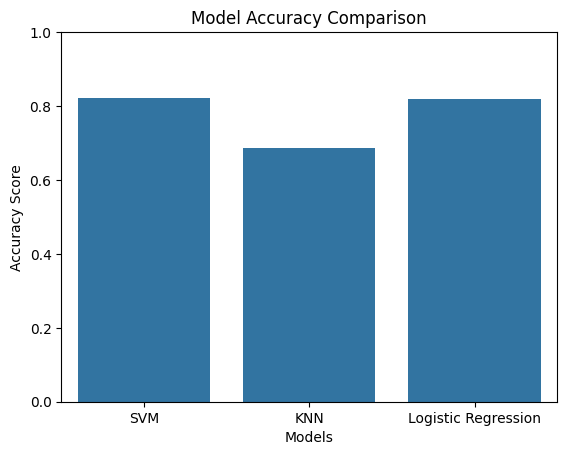

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dataframe for accuracies
model_performance = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_logreg)
    ]
})

# Plot accuracies
sns.barplot(x='Model', y='Accuracy', data=model_performance)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()
